In [1]:
options(warn = -1)

In [2]:
library(tidyverse)
library(rvest)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xml2

Attaching package: ‘rvest’

The following object is masked from ‘package:purrr’:

    pluck

The following object is masked from ‘package:readr’:

    guess_encoding



In [3]:
url <- 'https://nj.lianjia.com/zufang/pg'

link <- map2_chr(url, 1:100, paste0)

titles <- link %>%
  map(. %>%
     read_html() %>%
     html_nodes('.content__list--item--title a') %>%
     html_text(trim = TRUE)
  ) %>% unlist()

head(titles)

[1] "独栋·魔方公寓 南京珠江路店 南北通透可月付可短租 2室1厅"
[2] "苏宁睿城 2室1厅 南"                                    
[3] "合租·钟山晶典苑 3居室 南卧"                            
[4] "独栋·湾流国际青年社区 白下店 经典炫酷风 1室1厅"        
[5] "苜中路1号 2室1厅 南/北"                                
[6] "德盈国际 1室1厅 北"

In [4]:
descriptions <- link %>%
  map(. %>%
     read_html() %>%
     html_nodes('.content__list--item--des') %>%
     html_text(trim = TRUE)
  ) %>% unlist()
head(descriptions)

[1] "仅剩1间\n                    /\n                                    50㎡\n                  /北                  /\n                    2室1厅1卫"                                                                                                           
[2] "建邺-万达广场\n                  /\n                  95㎡\n                  /南                  /\n                    2室1厅1卫                  \n                    /\n                    中楼层                                            （34层）"
[3] "栖霞-马群\n                  /\n                  16㎡\n                  /南                  /\n                    3室1厅2卫                  \n                    /\n                    低楼层                                            （16层）"    
[4] "27-31㎡\n                  /东南 西南                  /\n                    1室1厅1卫"                                                                                                                                                                     
[5] "秦淮-月牙湖\n                  /\n                  52㎡\n                  /南 北                  /\n                    2室1厅1卫                  \n                    /\n                    低楼层                                            （6层）"
[6] "雨花台-能仁里\n                  /\n                  37㎡\n                  /北                  /\n                    1室1厅1卫                  \n                    /\n                    中楼层                                            （29层）"

In [5]:
price <- link %>%
  map(. %>%
     read_html() %>%
     html_nodes('.content__list--item-price em') %>%
     html_text(trim = TRUE)
  ) %>% unlist()
head(price)

[1] "4090" "5400" "2090" "2400" "3200" "3300"

In [5]:
# brands <- link %>%
#   map(. %>%
#      read_html() %>%
#      html_nodes('.content__list--item--brand') %>%
#      html_text(trim = TRUE)
#   ) %>% unlist()
# head(brands)

[1] "链家"             "自如"             "湾流国际青年社区" "链家"            
[5] "链家"             "自如"

In [6]:
renthouse <- tibble(title = titles, description = descriptions, price = price)
head(renthouse)

title,description,price
<chr>,<chr>,<chr>
独栋·魔方公寓 南京珠江路店 南北通透可月付可短租 2室1厅,仅剩1间 / 50㎡ /北 / 2室1厅1卫,4090
苏宁睿城 2室1厅 南,建邺-万达广场 / 95㎡ /南 / 2室1厅1卫 / 中楼层 （34层）,5400
合租·钟山晶典苑 3居室 南卧,栖霞-马群 / 16㎡ /南 / 3室1厅2卫 / 低楼层 （16层）,2090
独栋·湾流国际青年社区 白下店 经典炫酷风 1室1厅,27-31㎡ /东南 西南 / 1室1厅1卫,2400
苜中路1号 2室1厅 南/北,秦淮-月牙湖 / 52㎡ /南 北 / 2室1厅1卫 / 低楼层 （6层）,3200
德盈国际 1室1厅 北,雨花台-能仁里 / 37㎡ /北 / 1室1厅1卫 / 中楼层 （29层）,3300


In [7]:
c_desc <- c('district', 'location', 'square', 'direction', 'room', 'floor')
c_dist <- c('秦淮', '雨花台', '建邺', '鼓楼', '江宁', '玄武', '栖霞', '浦口')
rent_house <- renthouse %>% 
  separate(description, into = c_desc, sep = '/|-') %>% 
  filter(district %in% c_dist) %>% 
  mutate_if(is.character, trimws) %>% 
  separate(floor, into = c('building', 'floor')) %>% 
#   select(-9) %>% 
  mutate(square = parse_number(square), price = as.numeric(price), 
         floor = parse_number(floor), direction = gsub(' ', '/', direction))
head(rent_house)

title,district,location,square,direction,room,building,floor,price
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
苏宁睿城 2室1厅 南,建邺,万达广场,95,南,2室1厅1卫,中楼层,34,5400
合租·钟山晶典苑 3居室 南卧,栖霞,马群,16,南,3室1厅2卫,低楼层,16,2090
苜中路1号 2室1厅 南/北,秦淮,月牙湖,52,南/北,2室1厅1卫,低楼层,6,3200
德盈国际 1室1厅 北,雨花台,能仁里,37,北,1室1厅1卫,中楼层,29,3300
合租·新庄花园 3居室 南卧,玄武,红山,12,南,3室1厅2卫,高楼层,7,2130
新城保利天地 2室1厅 南/北,江宁,禄口,78,南/北,2室1厅1卫,高楼层,18,2000


In [8]:
# write_csv(rent_house, 'lianjia-nj-renthouse.csv')

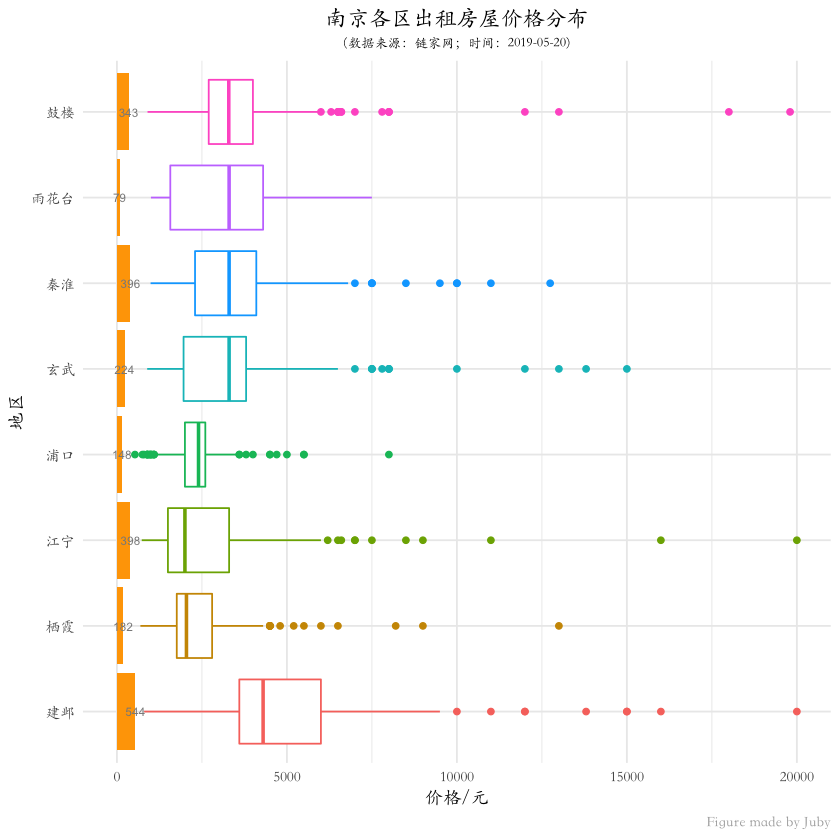

In [159]:
ggplot(rent_house, aes(district)) + 
  theme_minimal() + 
  geom_bar(fill = 'orange') + 
  geom_boxplot(aes(y = price, color = district), show.legend = FALSE) + 
  geom_text(stat = 'count', aes(label = ..count..), size = 2.5, color = 'gray54') + 
  scale_y_continuous(limits = c(0, 20000)) + 
  labs(title = '南京各区出租房屋价格分布', subtitle = '(数据来源：链家网；时间：2019-05-20)', 
       x = '地区', y = '价格/元', caption = 'Figure made by Juby') + 
  theme(text = element_text(family = 'STKaiti'), 
        plot.title = element_text(hjust = 0.5), 
        plot.subtitle = element_text(hjust = 0.5, size = 8), 
        plot.caption = element_text(color = 'darkgray')) + 
  coord_flip()


In [63]:
# ggsave('njhs.png', width = 5, height = 5)

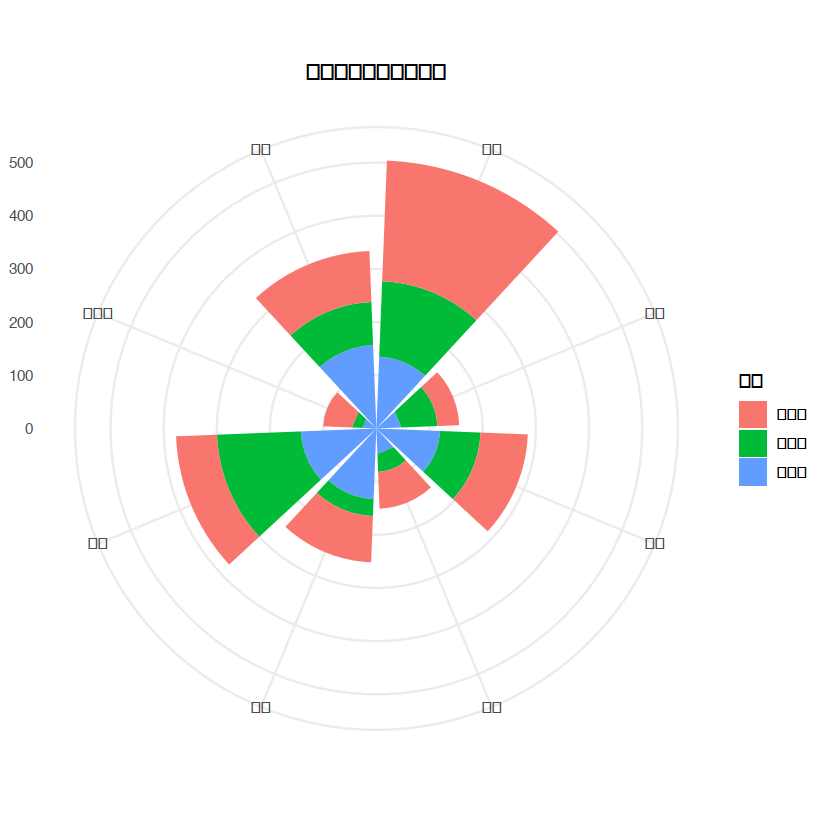

In [12]:
ggplot(rent_house, aes(district)) + 
  theme_minimal() + 
  geom_bar(aes(fill = building)) + 
  labs(title = '各区出租房屋楼层分布', fill = '楼层') + 
  theme(text = element_text(family = 'STKaiti'),
       plot.title = element_text(hjust = 0.5), 
       axis.title.x = element_blank(), 
       axis.title.y = element_blank()) + 
  coord_polar()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


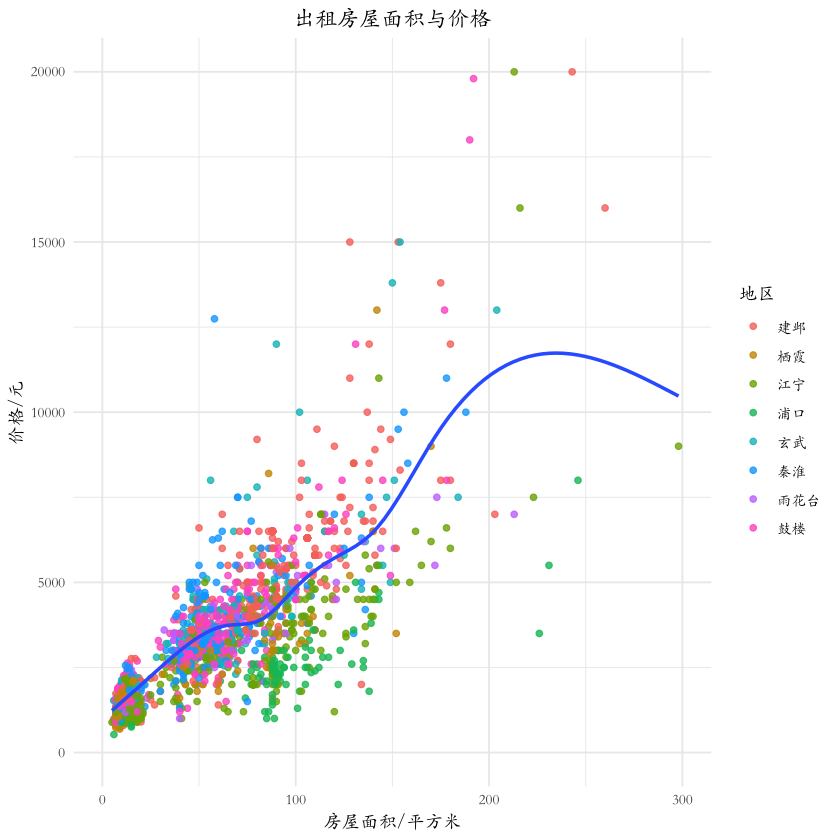

In [153]:
ggplot(rent_house, aes(square, price)) + 
  theme_minimal() + 
  geom_point(aes(color = district), alpha = 0.8) + 
  geom_smooth(se = FALSE) + 
  scale_x_continuous(limits = c(0, 300)) + 
  scale_y_continuous(limits = c(0, 20000)) + 
  labs(title = '出租房屋面积与价格', x = '房屋面积/平方米', y = '价格/元', color = '地区') + 
  theme(text = element_text(family = 'STKaiti'), 
        plot.title = element_text(hjust = 0.5))

In [162]:
str(rent_house)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	2314 obs. of  9 variables:
 $ title    : chr  "苏宁睿城 2室1厅 南" "合租·世茂招商语山 4居室 南卧" "苜中路1号 2室1厅 南/北" "新城保利天地 2室1厅 南/北" ...
 $ district : chr  "建邺" "栖霞" "秦淮" "江宁" ...
 $ location : chr  "万达广场" "马群" "月牙湖" "禄口" ...
 $ square   : num  95 12 52 78 14 70 53 46 18 110 ...
 $ direction: chr  "南" "南" "南/北" "南/北" ...
 $ room     : chr  "2室1厅1卫" "4室1厅2卫" "2室1厅1卫" "2室1厅1卫" ...
 $ building : chr  "中楼层" "中楼层" "低楼层" "高楼层" ...
 $ floor    : num  34 6 6 18 17 6 7 11 6 18 ...
 $ price    : num  5400 1760 3200 2000 1990 3600 3300 3600 1960 5800 ...
